# This notebook goes together with Basics : Forces

In [1]:
from DAVE import *
from DAVE.jupyter import *

Equilibrium-core version = 1.05
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
C:\data\Dave\Public\DAVE-notebooks\70 Book
Blender found at: C:\Program Files\Blender Foundation\Blender 2.83\blender.exe


In [2]:
s = Scene()

In [3]:
a = s.new_axis('axis_0')

In [4]:
for i in range(10):
    a = s.new_axis(f'axis_{i+1}', parent = a)
    a.rotation = (1,10,5)
    a.position = (-1, 3, 1.3)

In [5]:
s.print_node_tree()

axis_0 [Axis]
 |-> axis_1 [Axis]
 |    |-> axis_2 [Axis]
 |    |    |-> axis_3 [Axis]
 |    |    |    |-> axis_4 [Axis]
 |    |    |    |    |-> axis_5 [Axis]
 |    |    |    |    |    |-> axis_6 [Axis]
 |    |    |    |    |    |    |-> axis_7 [Axis]
 |    |    |    |    |    |    |    |-> axis_8 [Axis]
 |    |    |    |    |    |    |    |    |-> axis_9 [Axis]
 |    |    |    |    |    |    |    |    |    |-> axis_10 [Axis]


In [6]:
p = s.new_point('point',parent=a)

In [7]:
f = s.new_force('force', parent = p)

In [8]:
f.force = (3,4,5)

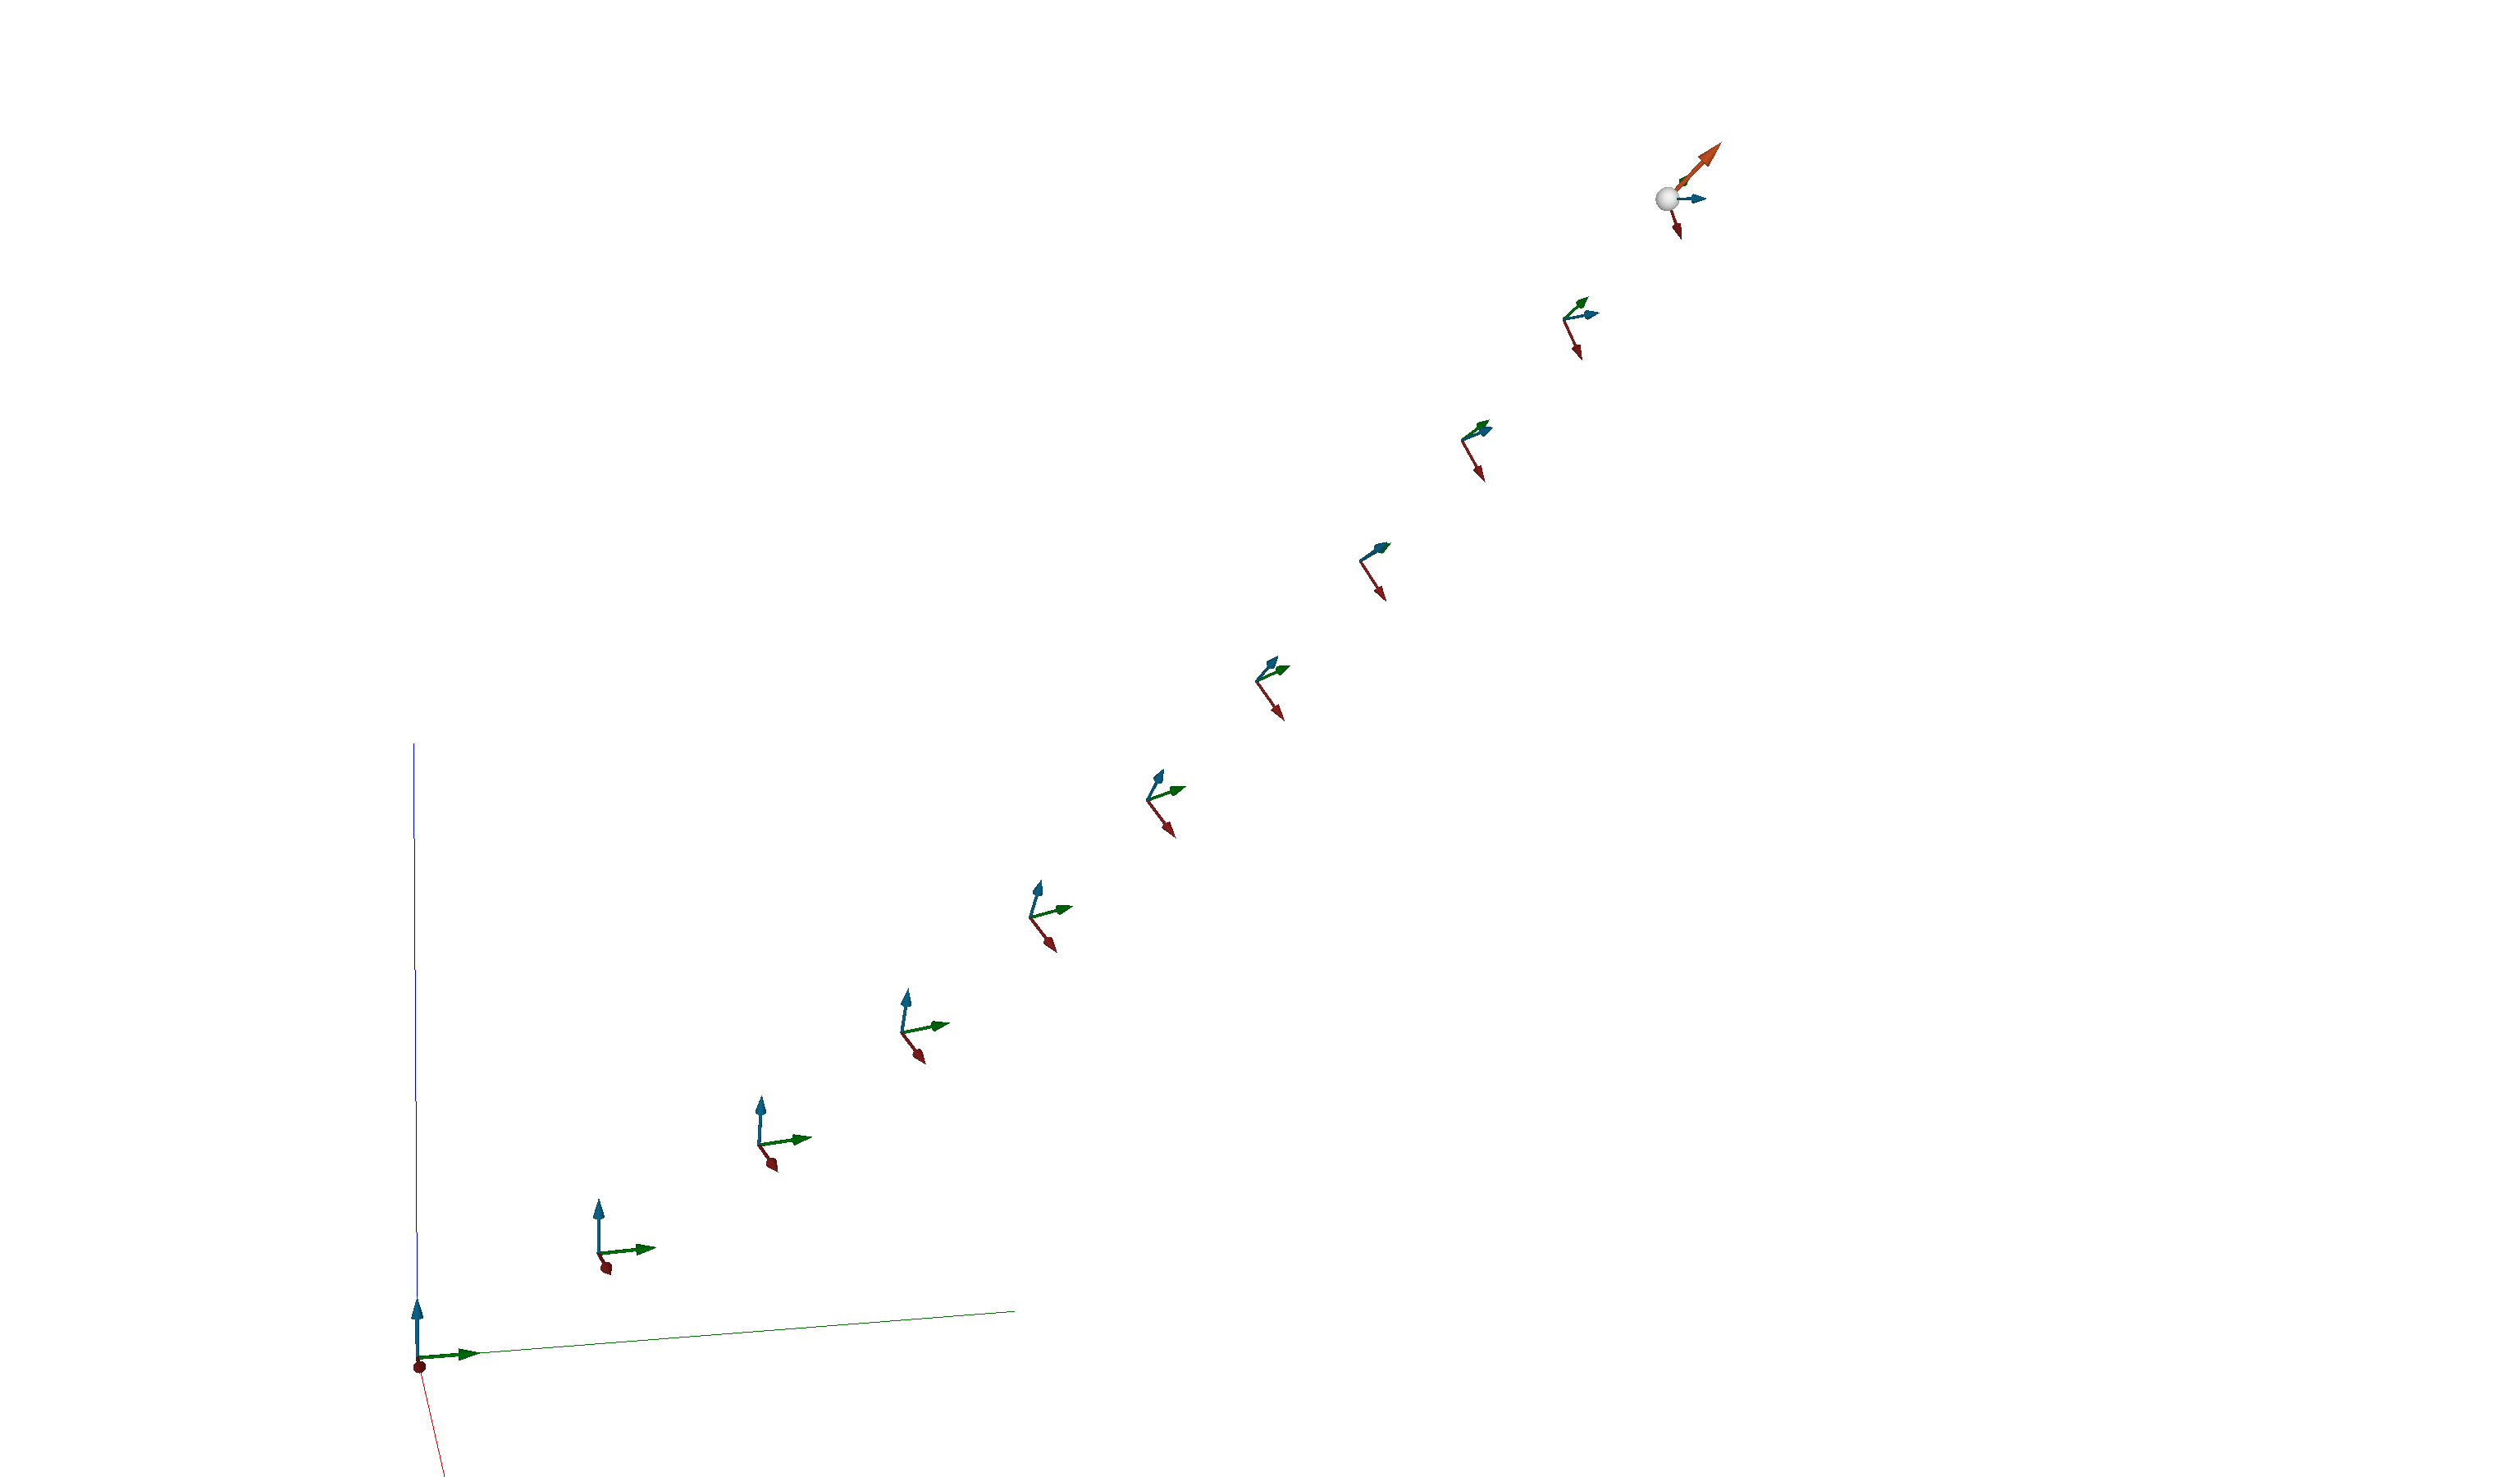

In [23]:
show(s, sea = False, camera_pos = (47.27125494760996, -2.2893149055027044, 11.008934429915707), lookat = (8.191845556784727, 11.628676713890059, 10.152255428376742), force_normalize = True, force_scale = 1.6, cog_scale = 0.25)

Update() calculates the forces in the model

In [9]:
s.update()

We can now verify that the applied force on axis 0 is what we expect it to be:

The first three components should be identical to the force applied on the Point

In [17]:
f.force

(3.0, 4.0, 5.0)

In [18]:
s['axis_0'].applied_force[:3]

(3.0, 4.0, 5.0)

The applied moment should be identical to the cross product of the global position of the Point and the applied force

In [19]:
np.cross(p.global_position, f.force)

array([ 43.06199224,  89.61104132, -97.52602839])

In [20]:
s['axis_0'].applied_force[3:]

(43.06199223541866, 89.61104131667722, -97.52602839459297)